# Task 1

Loading csv file into notebook

In [631]:
from pandas import read_csv , concat , get_dummies , DataFrame
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from matplotlib.pyplot import pie , hist , show , xlabel , ylabel , title

In [632]:
path = "D:\\datasets\\Heart\\heart.csv"
file = read_csv(path)
df = file.copy()
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
276,51,M,NAP,135,160,0,Normal,150,N,2.0,Flat,1
815,68,M,NAP,118,277,0,Normal,151,N,1.0,Up,0
54,52,F,ASY,130,180,0,Normal,140,Y,1.5,Flat,0
610,54,F,ASY,127,333,1,ST,154,N,0.0,Flat,1
729,42,M,ATA,120,295,0,Normal,162,N,0.0,Up,0
636,48,M,ATA,130,245,0,LVH,180,N,0.2,Flat,0
753,34,F,ATA,118,210,0,Normal,192,N,0.7,Up,0
43,52,M,NAP,140,259,0,ST,170,N,0.0,Up,0
179,46,F,ASY,130,238,0,Normal,90,N,0.0,Up,0
705,59,M,ATA,140,221,0,Normal,164,Y,0.0,Up,0


In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [634]:
label = df.HeartDisease
features = df.drop(['HeartDisease'],axis=1)

In [635]:
label.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# Task 2

Analyzing data

In [636]:
sick = [i for i in label if i == 1]
normal = [i for i in label if i == 0]

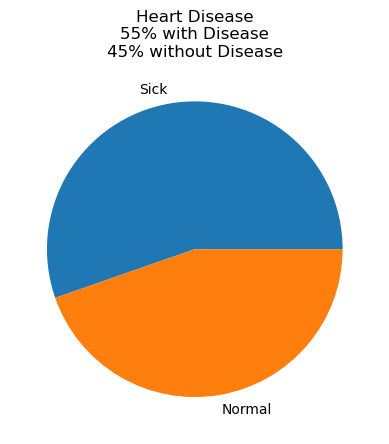

In [637]:
sick_percent = (len(sick)*100)//len(label)
normal_percent = 100 - sick_percent
pie([len(sick),len(normal)],labels=['Sick','Normal'])
title(f'Heart Disease\n{sick_percent}% with Disease\n{normal_percent}% without Disease')
show()

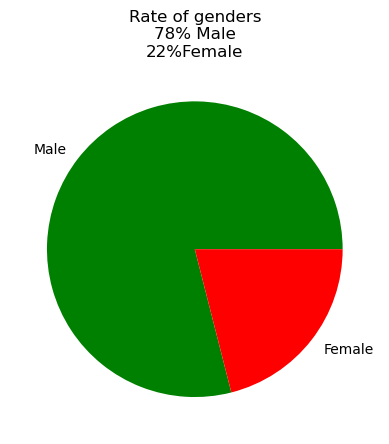

In [638]:
male_percent = (len([i for i in df.Sex if i == 'M'])*100)//len(df.Sex)
Female_percent = 100 - male_percent
pie([len([i for i in df.Sex if i == 'M']),
     len([i for i in df.Sex if i == 'F'])],
    labels=['Male','Female'],colors=['green','red'])
title(f'Rate of genders\n{male_percent}% Male\n{Female_percent}%Female')
show()

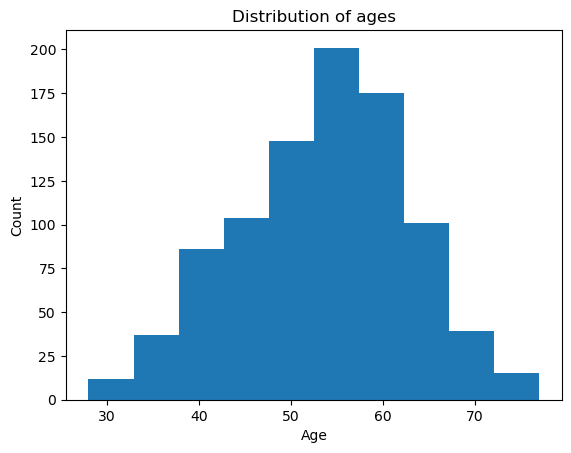

In [639]:
hist(df.Age)
title('Distribution of ages')
xlabel('Age')
ylabel('Count')
show()

In [640]:
sick_df = df[df['HeartDisease']==1]
print(f'The average age of people with heart disease is : {mean(df.Age):.1f}')

The average age of people with heart disease is : 53.5


# Task 3

Data preparing

In [641]:
scaler = StandardScaler()

In [642]:
nan_x_cols = [col for col in features if features[col].dtype=='O']
numeric_x = features.drop(nan_x_cols,axis=1)
numeric_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          918 non-null    int64  
 1   RestingBP    918 non-null    int64  
 2   Cholesterol  918 non-null    int64  
 3   FastingBS    918 non-null    int64  
 4   MaxHR        918 non-null    int64  
 5   Oldpeak      918 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 43.2 KB


In [643]:
scaled_numeric_x = DataFrame(scaler.fit_transform(numeric_x),columns=numeric_x.columns)
scaled_numeric_x.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-7.304735e-17,1.084221e-16,-6.482953e-16,-1.009843e-15,4.370747e-16,-2.024524e-16
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-2.706015e+00,-7.154995e+00,-1.818435e+00,-5.513413e-01,-3.018469e+00,-3.271482e+00
25%,-6.906294e-01,-6.699346e-01,-2.337038e-01,-5.513413e-01,-6.605778e-01,-8.324324e-01
50%,5.188098e-02,-1.295128e-01,2.213632e-01,-5.513413e-01,4.678968e-02,-2.695748e-01
75%,6.883185e-01,4.109089e-01,6.238346e-01,-5.513413e-01,7.541571e-01,5.747115e-01
max,2.491558e+00,3.653439e+00,3.697252e+00,1.813758e+00,2.561874e+00,4.983762e+00


In [644]:
nan_x = features.drop(numeric_x.columns,axis=1)
nan_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             918 non-null    object
 1   ChestPainType   918 non-null    object
 2   RestingECG      918 non-null    object
 3   ExerciseAngina  918 non-null    object
 4   ST_Slope        918 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


In [645]:
for col in nan_x.columns :
    print(col)
    print(nan_x[col].unique())

Sex
['M' 'F']
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
RestingECG
['Normal' 'ST' 'LVH']
ExerciseAngina
['N' 'Y']
ST_Slope
['Up' 'Flat' 'Down']


In [646]:
encoded_nan_x = get_dummies(nan_x)
encoded_nan_x.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [647]:
ready_features = concat([scaled_numeric_x,encoded_nan_x],axis=1)
ready_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    float64
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   Sex_F              918 non-null    uint8  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ASY  918 non-null    uint8  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_LVH     918 non-null    uint8  
 13  RestingECG_Normal  918 non-null    uint8  
 14  RestingECG_ST      918 non-null    uint8  
 15  ExerciseAngina_N   918 non-null    uint8  
 16  ExerciseAngina_Y   918 non

In [648]:
ready_features.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-7.304735e-17,1.084221e-16,-6.482953e-16,-1.009843e-15,4.370747e-16,-2.024524e-16,0.210240,0.789760,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,0.407701,0.407701,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,-2.706015e+00,-7.154995e+00,-1.818435e+00,-5.513413e-01,-3.018469e+00,-3.271482e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.906294e-01,-6.699346e-01,-2.337038e-01,-5.513413e-01,-6.605778e-01,-8.324324e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.188098e-02,-1.295128e-01,2.213632e-01,-5.513413e-01,4.678968e-02,-2.695748e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.883185e-01,4.109089e-01,6.238346e-01,-5.513413e-01,7.541571e-01,5.747115e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,2.491558e+00,3.653439e+00,3.697252e+00,1.813758e+00,2.561874e+00,4.983762e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [667]:
xtr , xts , ytr , yts = train_test_split(ready_features,label,test_size=0.2,random_state=0)

Size of train set : 734
Size of test set : 184


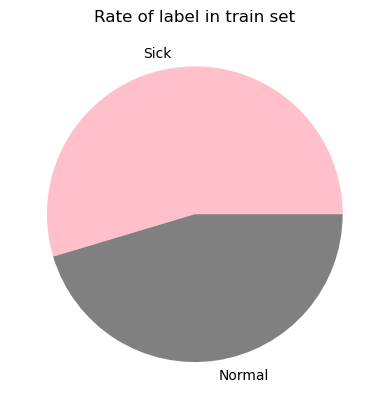

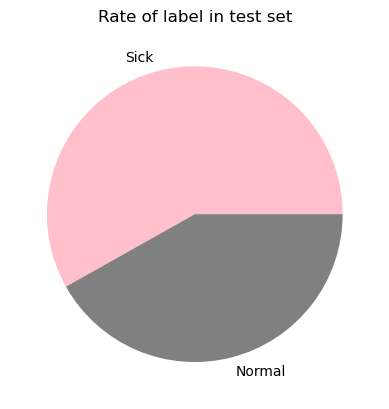

In [668]:
print(f'Size of train set : {len(xtr)}\nSize of test set : {len(xts)}')
one_tr = len([i for i in ytr if i ==1])
zero_tr = len(ytr) - one_tr
one_ts = len([i for i in yts if i ==1])
zero_ts = len(yts) - one_ts
pie([one_tr,zero_tr],labels=['Sick','Normal'],colors=['pink','gray'])
title('Rate of label in train set')
show()
pie([one_ts,zero_ts],labels=['Sick','Normal'],colors=['pink','gray'])
title('Rate of label in test set')
show()

# Task 4

Modeling and evaluating

In [669]:
model = GradientBoostingClassifier()

In [670]:
model.fit(xtr,ytr)

GradientBoostingClassifier()

In [671]:
print('Model accuracy on train set')
model.score(xtr,ytr)*100

Model accuracy on train set


95.09536784741145

In [675]:
print('Model accuracy on test set')
model.score(xts,yts)*100

Model accuracy on test set


92.3913043478261

In [676]:
print('Model accuracy on full data')
model.fit(ready_features,label)
model.score(ready_features,label)*100

Model accuracy on full data


93.4640522875817

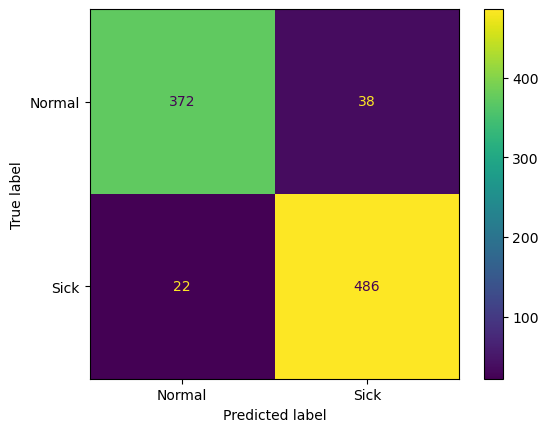

In [677]:
predicts = model.predict(ready_features)
Confusion_matrix = confusion_matrix(label,predicts)
display = ConfusionMatrixDisplay(Confusion_matrix,display_labels=['Normal','Sick'])
display.plot()
show()

Dataset link: https://www.kaggle.com/datasets/amirmahdiabbootalebi/heart-disease

# End